Quick Statistics Exercise
===

The file `gen_data.sh` quickly generates 1,000 Cartesian (two-column x,y) data files of sinsoidal signals with an additive white Gaussian noise component. 

This ipython notebook explores how to quickly read those data files into memory and perform operations on them.

In [1]:
#!git pull

In [2]:
# Standard module imports and Jupyter magics
%matplotlib inline
import sys
sys.path.append('../common')
from plt_style import *
import glob,natsort

In [3]:
# Scientific/Numerical modules required by exercise
import numpy as np
import pylab as plt

In [4]:
# Generate synthetic data for the exercise
!tar xvjf dat.txz

dat/
dat/seed_983.txt
dat/seed_929.txt
dat/seed_247.txt
dat/seed_003.txt
dat/seed_407.txt
dat/seed_114.txt
dat/seed_768.txt
dat/seed_727.txt
dat/seed_876.txt
dat/seed_793.txt
dat/seed_462.txt
dat/seed_875.txt
dat/seed_051.txt
dat/seed_224.txt
dat/seed_864.txt
dat/seed_655.txt
dat/seed_783.txt
dat/seed_695.txt
dat/seed_612.txt
dat/seed_252.txt
dat/seed_008.txt
dat/seed_826.txt
dat/seed_576.txt
dat/seed_798.txt
dat/seed_129.txt
dat/seed_896.txt
dat/seed_180.txt
dat/seed_770.txt
dat/seed_334.txt
dat/seed_426.txt
dat/seed_640.txt
dat/seed_132.txt
dat/seed_289.txt
dat/seed_351.txt
dat/seed_468.txt
dat/seed_483.txt
dat/seed_928.txt
dat/seed_982.txt
dat/seed_549.txt
dat/seed_871.txt
dat/seed_204.txt
dat/seed_654.txt
dat/seed_140.txt
dat/seed_125.txt
dat/seed_786.txt
dat/seed_981.txt
dat/seed_732.txt
dat/seed_100.txt
dat/seed_556.txt
dat/seed_039.txt
dat/seed_562.txt
dat/seed_609.txt
dat/seed_205.txt
dat/seed_158.txt
dat/seed_967.txt
dat/seed_059.txt
dat/seed_759.txt
dat/seed_096.txt
dat/seed_

In [5]:
# Exploring the filesystem
!ls -l dat/ | head -n 10 
!ls -l dat/ | tail -n 10
!du --si -cs dat/

total 32000
-rw-r--r-- 1 jyalim jyalim 25250 Aug 31  2020 seed_000.txt
-rw-r--r-- 1 jyalim jyalim 25256 Aug 31  2020 seed_001.txt
-rw-r--r-- 1 jyalim jyalim 25256 Aug 31  2020 seed_002.txt
-rw-r--r-- 1 jyalim jyalim 25247 Aug 31  2020 seed_003.txt
-rw-r--r-- 1 jyalim jyalim 25252 Aug 31  2020 seed_004.txt
-rw-r--r-- 1 jyalim jyalim 25245 Aug 31  2020 seed_005.txt
-rw-r--r-- 1 jyalim jyalim 25248 Aug 31  2020 seed_006.txt
-rw-r--r-- 1 jyalim jyalim 25251 Aug 31  2020 seed_007.txt
-rw-r--r-- 1 jyalim jyalim 25248 Aug 31  2020 seed_008.txt
ls: write error: Broken pipe
-rw-r--r-- 1 jyalim jyalim 25252 Aug 31  2020 seed_990.txt
-rw-r--r-- 1 jyalim jyalim 25248 Aug 31  2020 seed_991.txt
-rw-r--r-- 1 jyalim jyalim 25249 Aug 31  2020 seed_992.txt
-rw-r--r-- 1 jyalim jyalim 25255 Aug 31  2020 seed_993.txt
-rw-r--r-- 1 jyalim jyalim 25249 Aug 31  2020 seed_994.txt
-rw-r--r-- 1 jyalim jyalim 25254 Aug 31  2020 seed_995.txt
-rw-r--r-- 1 jyalim jyalim 25255 Aug 31  2020 seed_996.txt
-rw-r--r-- 1 jy

Glob
---

One of the easiest ways to obtain paths to data files in python is to use the `glob` module which provides the `glob.glob` function. This function matches patterns in the filesystem based on standard regex, e.g. `dat/*.txt` expands to all files with extension `.txt` in the relative `dat/` directory.

Natsort
---

This very powerful module provides a sorting mechansim uncommon to the standard Linux shell: the `natsort.realsorted` function will sort strings based on real (floating) point values, e.g. 

`natsort.realsorted(['string_5e-2.txt','string_5e3.txt','string_5e0.txt'])` 

becomes: 

`['string_5e-2.txt', 'string_5e0.txt', 'string_5e3.txt']`


In [6]:
G = natsort.realsorted(glob.glob('dat/*.txt'))
print(G[:10])
print(G[-10:])
print(len(G))

['dat/seed_000.txt', 'dat/seed_001.txt', 'dat/seed_002.txt', 'dat/seed_003.txt', 'dat/seed_004.txt', 'dat/seed_005.txt', 'dat/seed_006.txt', 'dat/seed_007.txt', 'dat/seed_008.txt', 'dat/seed_009.txt']
['dat/seed_990.txt', 'dat/seed_991.txt', 'dat/seed_992.txt', 'dat/seed_993.txt', 'dat/seed_994.txt', 'dat/seed_995.txt', 'dat/seed_996.txt', 'dat/seed_997.txt', 'dat/seed_998.txt', 'dat/seed_999.txt']
1000


Investigating the Data
---

Here we'll plot a single noisy signal, to get a good visual sample of what the data look like.

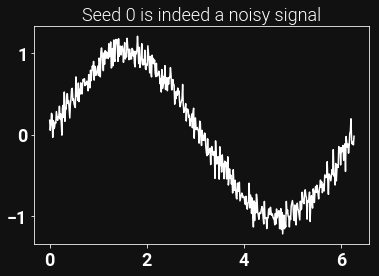

In [7]:
x,y = np.loadtxt(G[0]).T
plt.figure()
plt.plot(x,y,'w-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Seed 0 is indeed a noisy signal',fontsize=18)
plt.gcf().set_facecolor('#111111');

Recovering the Mean signal
---

Here two methods are presented for recovering the mean signal. 

The first method, slightly slower, uses an explicit loop. 

The second method uses a list comprehension.

Why is one method faster than the other? 

Because the explicit loop uses more high-level (and slow) python interpretation between executions of very fast C code.

In [17]:
%%time
# Note that the zeroth file is already read
D = y
for k,g in enumerate(G):
    if k > 0:
        x,y = np.loadtxt(g).T
        D += y
M = D / k

CPU times: user 3.28 s, sys: 80.9 ms, total: 3.36 s
Wall time: 4.39 s


In [18]:
%%time
D = np.array([ np.loadtxt(g).T[1] for g in G ])
M = np.mean(D,axis=0)

CPU times: user 2.48 s, sys: 49.7 ms, total: 2.53 s
Wall time: 2.87 s


In [19]:
%%time
L = []
for k,g in enumerate(G):
    L.append(np.loadtxt(g).T)

CPU times: user 2.44 s, sys: 26.6 ms, total: 2.47 s
Wall time: 2.79 s


In [20]:
%%time
running_sum = 0
for x,y in L:
    running_sum += y
resulting_mean = running_sum / len(L)

CPU times: user 2.35 ms, sys: 0 ns, total: 2.35 ms
Wall time: 2.36 ms


In [24]:
%%time
D = np.array([ np.loadtxt(g).T[1] for g in G ])

CPU times: user 2.65 s, sys: 47.8 ms, total: 2.7 s
Wall time: 3.07 s


In [22]:
%%time
M = np.mean(D,axis=0)

CPU times: user 0 ns, sys: 409 µs, total: 409 µs
Wall time: 415 µs


### Mean signal

Now that the mean signal is recovered in memory, we can visualize:

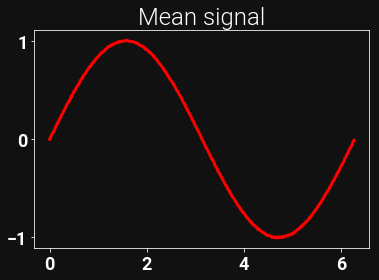

In [10]:
plt.plot(x,M,'r-',lw=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Mean signal')
plt.gcf().set_facecolor('#111111');

Signal Perturbation
---

What about the accumulated noise?

Note that `D` and `M` have different shapes, yet python's numpy is smart enough to figure it out

In [11]:
print(D.shape)
print(M.shape)

(1000, 500)
(500,)


In [12]:
%%time
# Slow explicit method

# initialize object
dZ = 0*D
for k,d in enumerate(D):
    dZ[k] = d - M

CPU times: user 492 ms, sys: 29.7 ms, total: 522 ms
Wall time: 126 ms


In [13]:
%%time
# Fast list comprehension way from previous example
dY = np.array([d - M for d in D])

CPU times: user 7.99 ms, sys: 5.99 ms, total: 14 ms
Wall time: 12.4 ms


In [14]:
%%time
# Significantly faster method
dX = D - M

CPU times: user 404 µs, sys: 6.06 ms, total: 6.47 ms
Wall time: 4.82 ms


In [15]:
# Verification
print(abs(dX-dZ).max())
print(abs(dX-dY).max())


0.0
0.0


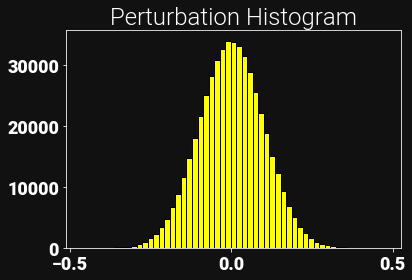

In [16]:
# Visualization (change the bin number)
plt.hist(dX.flatten(),bins=55,edgecolor='k',facecolor='#ffff00')
plt.title('Perturbation Histogram',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gcf().set_facecolor('#111111');

### For More, scipy-lectures are recommended: [https://scipy-lectures.org/](https://scipy-lectures.org/)